In [7]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

In [2]:
#load music.csv dataset 
data=pd.read_csv('insurance_data.csv')

In [3]:
data.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [4]:
data.columns

Index(['age', 'bought_insurance'], dtype='object')

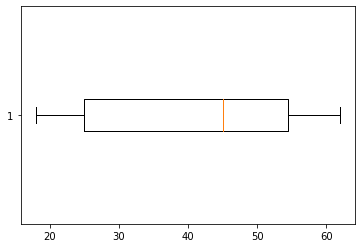

In [21]:
plt.boxplot(data['age'],vert=False)
plt.show()

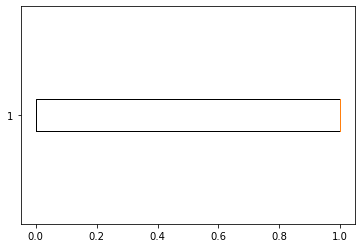

In [22]:
plt.boxplot(data['bought_insurance'],vert=False)
plt.show()

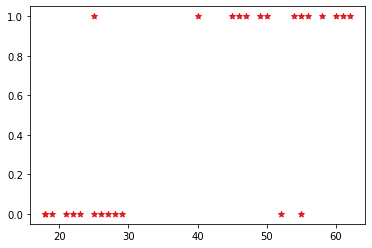

In [30]:
plt.scatter(data['age'],data['bought_insurance'],marker='*',edgecolors="red")
plt.show()

In [24]:
# create input Dataset 
X= data.drop(columns=['bought_insurance'])
# create output dataset
y= data['bought_insurance']

In [25]:
# Give training and testing dataset to model 
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

#instantiate the DecisionTreeClassifier 
model= LogisticRegression()
# Train the model with 80% of training data 
model= model.fit(X_train,y_train)

# Test model predtiction  
predictions =model.predict(X_test)

#check the accuracy score  
score = accuracy_score(y_test,predictions)
score

0.8333333333333334

In [33]:
model.predict([[26]])

array([0], dtype=int64)

In [26]:
c=confusion_matrix(y_test,predictions)
c

array([[3, 1],
       [0, 2]], dtype=int64)

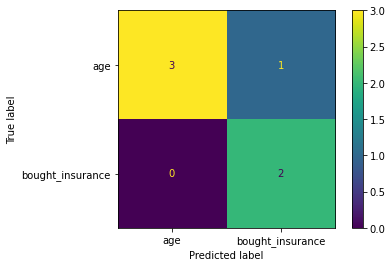

In [27]:
#disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c, display_labels=["age","bought_insurance"])
disp.plot()
plt.show()

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

